In [3]:
# Step 1: Import all packages and libraries in Python that need for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
from scipy import stats
# Theses are packages and libraries that for map visualization
import folium
from folium.plugins import HeatMap
from folium.plugins import FloatImage
sns.set()


In [4]:
data = pd.read_csv("covid-vaccination-vs-death_ratio.csv")
data.sample(70)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
22783,22783,Spain,ESP,2021-08-11,60449774.0,34196761.0,29221276.0,104,46738051.0,73.166853
23352,23352,Switzerland,CHE,2020-12-31,6384.0,6282.0,9.0,92,8747093.0,0.071818
6621,6621,Denmark,DNK,2021-12-24,11724765.0,4784019.0,4536315.0,15,5823953.0,82.143846
22167,22167,South Africa,ZAF,2021-03-23,194257.0,194257.0,194257.0,85,60410705.0,0.321561
10206,10206,Haiti,HTI,2021-09-07,46201.0,34317.0,12225.0,0,11611680.0,0.295539
...,...,...,...,...,...,...,...,...,...,...
8538,8538,Georgia,GEO,2021-06-30,261652.0,161580.0,100072.0,19,3974805.0,4.065105
4896,4896,Cayman Islands,CYM,2021-07-21,96331.0,49403.0,46928.0,0,66497.0,74.293577
13730,13730,Latvia,LVA,2021-10-27,1916358.0,1132650.0,993704.0,26,1857389.0,60.980764
2929,2929,Belize,BLZ,2021-07-20,160283.0,116426.0,43857.0,0,408588.0,28.494718


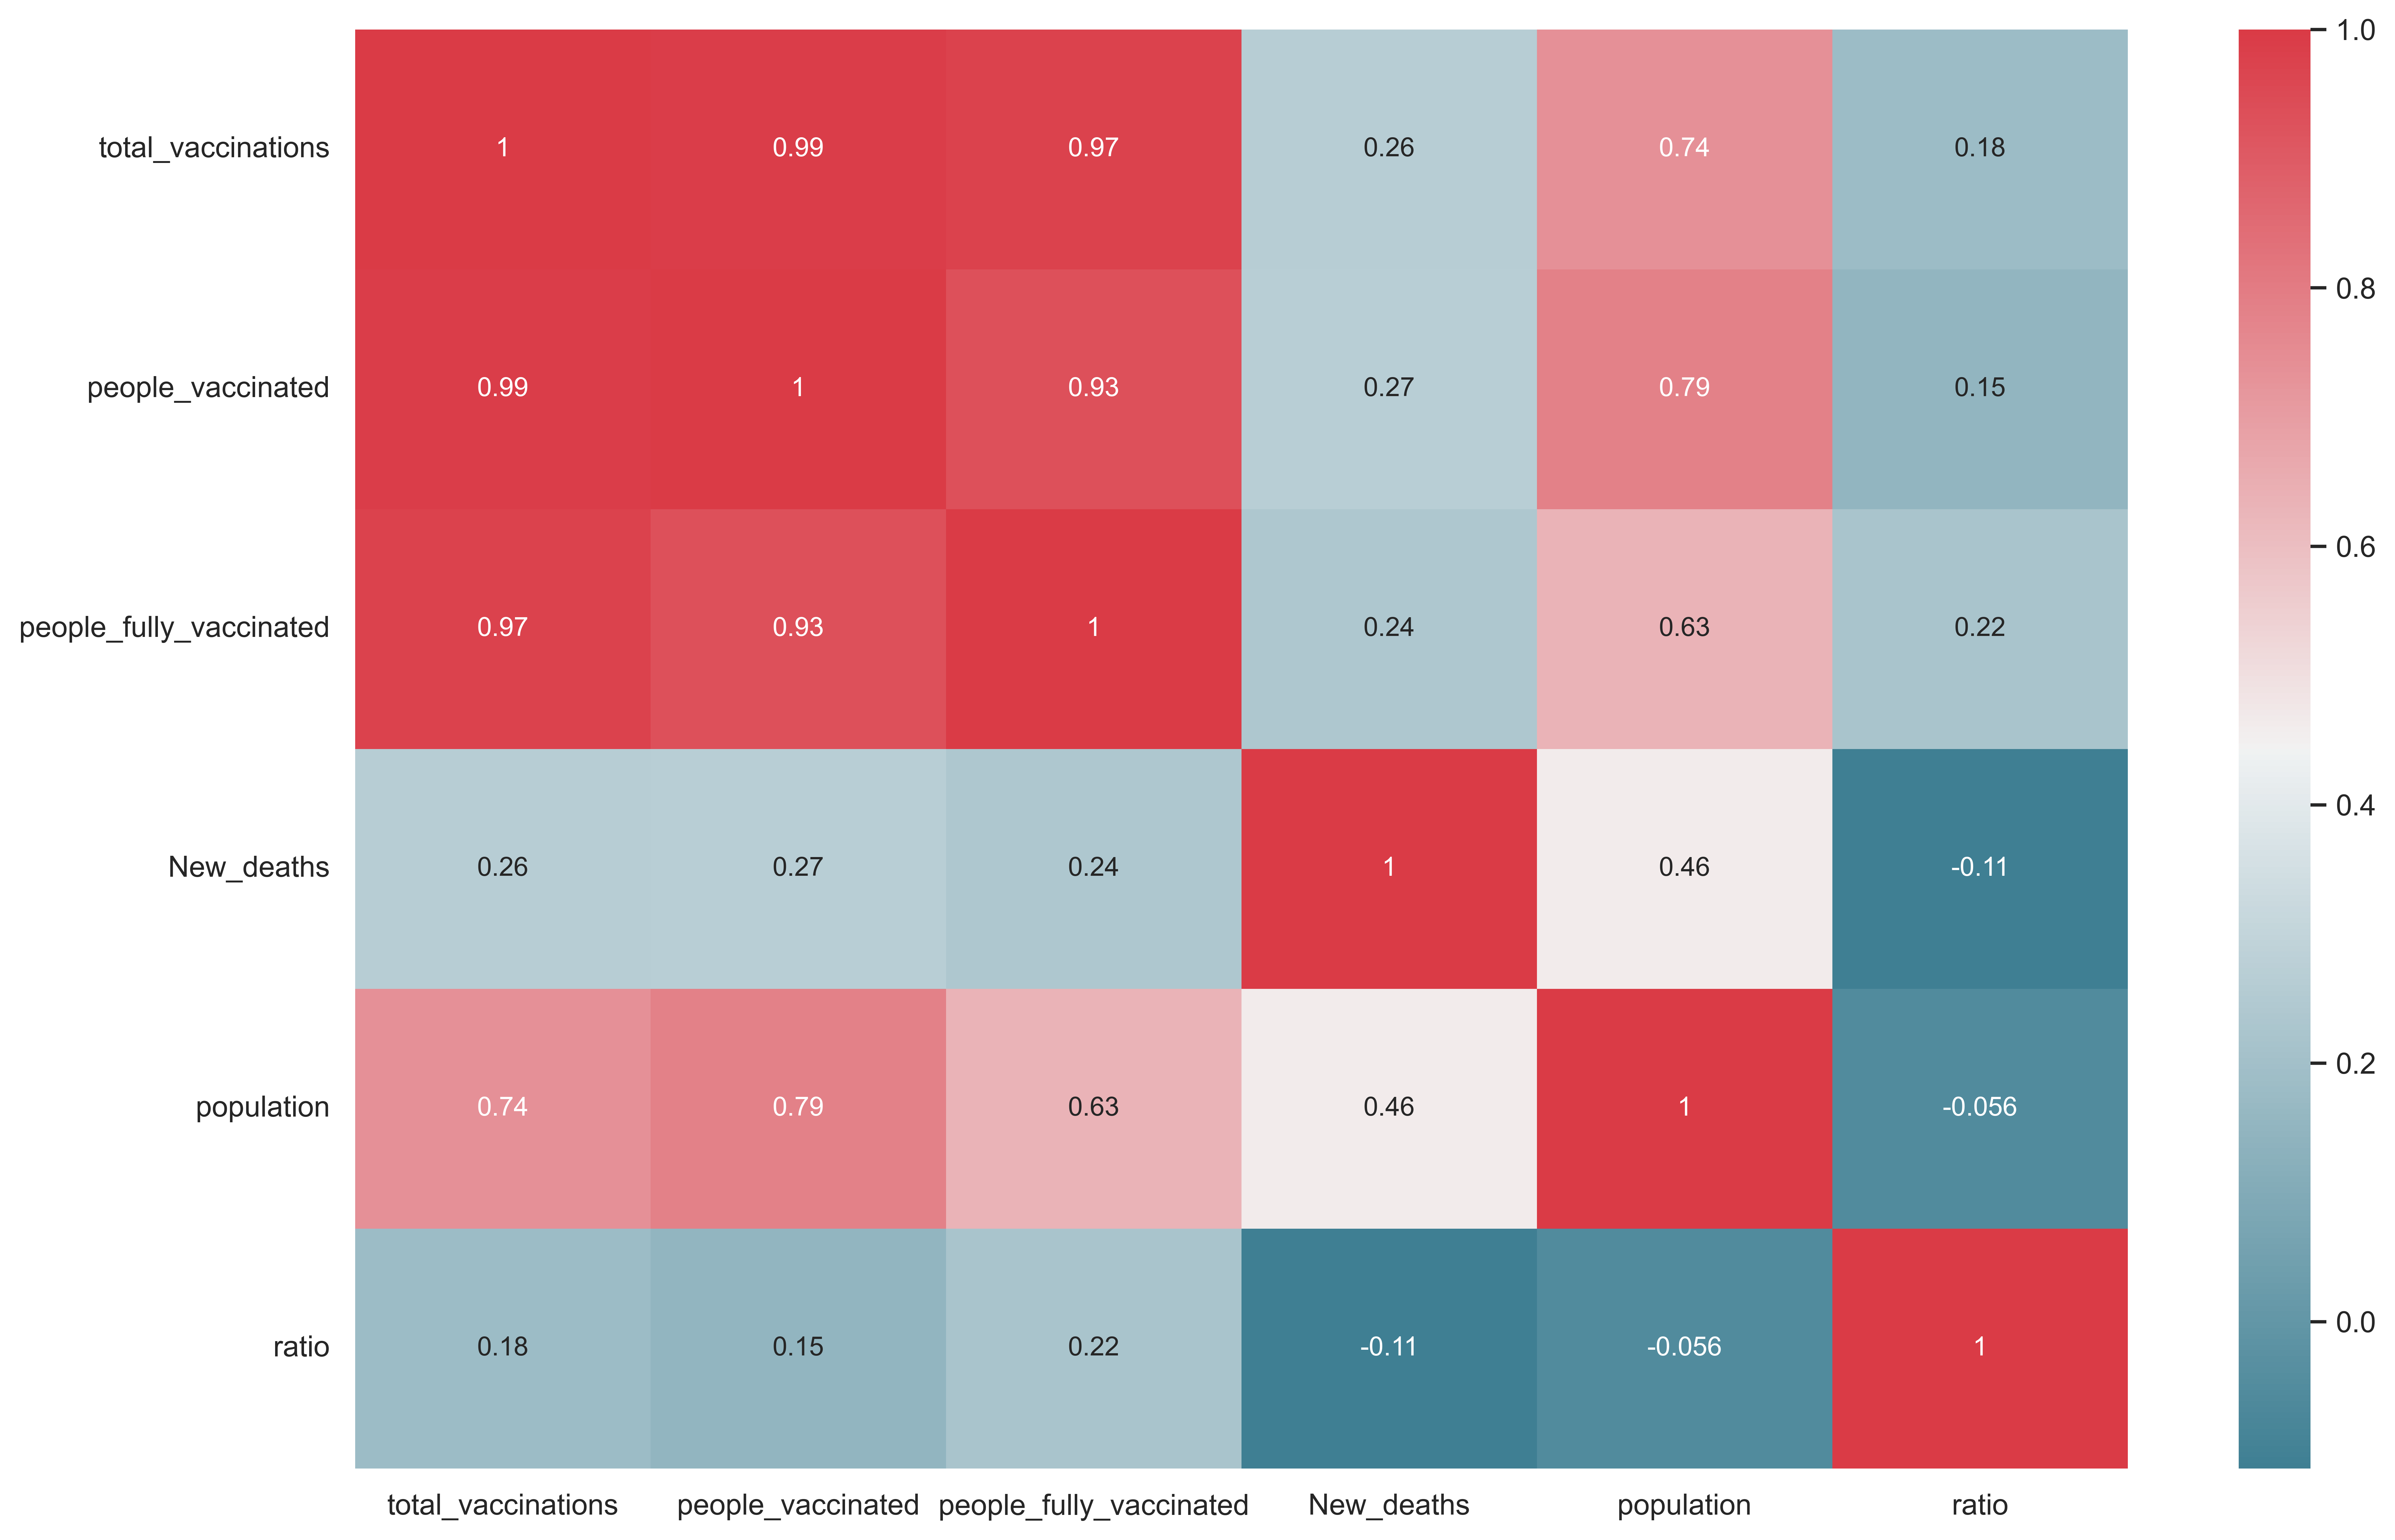

In [5]:
data = data.drop(data.columns[[0, 1,2, 3]], axis=1) 
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (15, 10), dpi = 600)
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data.corr(), annot=True, cmap = colormap)

correlation_heatmap(data) 

In [6]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,2.662300e+04,2.662300e+04,2.662300e+04,26623.000000,2.662300e+04,26623.000000
mean,2.624900e+07,1.587149e+07,1.015975e+07,104.341584,5.068306e+07,36.058352
std,9.172916e+07,5.852142e+07,3.409173e+07,343.701812,1.585035e+08,27.286028
min,1.000000e+00,1.000000e+00,1.000000e+00,-92.000000,1.373000e+03,0.000011
25%,6.062655e+05,4.006990e+05,1.765970e+05,1.000000,3.354825e+06,9.940602
50%,3.570392e+06,2.248865e+06,1.169177e+06,10.000000,1.034502e+07,32.817733
75%,1.560763e+07,8.804162e+06,5.698058e+06,52.000000,3.823269e+07,60.421409
max,2.422908e+09,1.225000e+09,1.076308e+09,8786.000000,1.446645e+09,122.149682


In [7]:
print('shape of data is:',data.shape)
data.info()

shape of data is: (26623, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26623 entries, 0 to 26622
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_vaccinations       26623 non-null  float64
 1   people_vaccinated        26623 non-null  float64
 2   people_fully_vaccinated  26623 non-null  float64
 3   New_deaths               26623 non-null  int64  
 4   population               26623 non-null  float64
 5   ratio                    26623 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.2 MB
